# Matplotlib

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


%matplotlib notebook

from IPython.core.display import display, HTML                       
display(HTML("<style>.container { width:80% !important; }</style>"))

# Figsize and GPI

https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size?noredirect=1&lq=1

When displaying plots we need to get a couple of things right: 1) It must look good in the notebook (because we are going to be showing people plots in the NB a lot) 2) It must look good in the paper it eventually goes into (because that's the reason we are making all these plots!). The easiest way to ensure we get both of these is to setup the plots to look the same in both.

Starting with 1: By default plots are tiny in notebooks (much smaller than a halfwidth image in a paper). There are 2 knobs we can turn to improve this. 1) DPI: scales everything (axis, lines, lables, legends, ticks, etc) proportionally. 2) Figsize: just stretches the axis by other elements retain the same physical size. We want to keep things proportional so we use DPI to increase the size of the plots in the NB.

To work out how much to increase DPI by we do some hacky measuring of plots and find that they tend to be ~3.25 inches in width (makes sense - A4 is 8.25 inches wide so chop off an inch each side). We then play with DPI to see what creates plots approximately that size. **Note that this will be screen DPI and zoom dependent!** but works fine on my laptop + desktop screen.

I really wish there was a way to enforce display size in inches. I suspect custom css is the way to go? At some point I should look at https://stackoverflow.com/questions/32156248/how-do-i-set-custom-css-for-my-ipython-ihaskell-jupyter-notebook and put some css in `~/.jupyter/custom/custom.css`.

Now what about plots that will actually be a different size in the paper (e.g. full page plots). These you can then play individually with the figsize which may (if the individual subplots are not the same size as the normal plots) require a corresponding DPI change.

In [2]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)

## Figsize

[6. 4.] 72.0
[12.  8.] 72.0
[12.  4.] 72.0


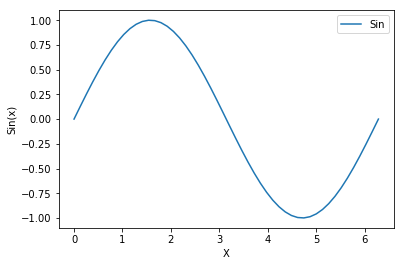

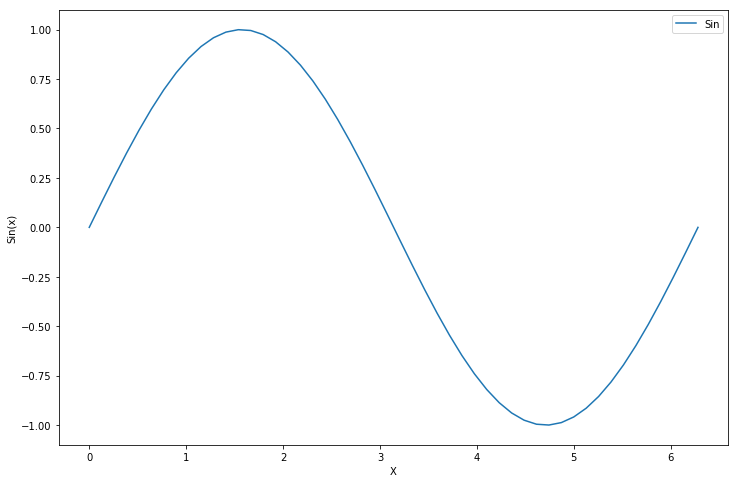

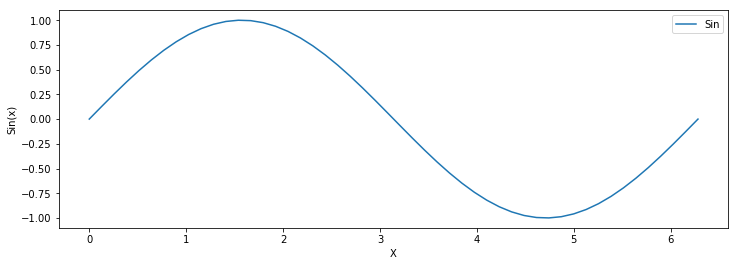

In [10]:
for figsize in [None, (12, 8), (12, 4)]:
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y, label="Sin")
    ax.set(xlabel="X", ylabel="Sin(x)")
    ax.legend()
    print(fig.get_size_inches(), fig.get_dpi())
    
# While increasing the figsize makes these look a bit better here, when they are scaled to be put in the paper the legends etc will be tiny...

## DPI

[6. 4.] 72.0
[6. 4.] 100
[6. 4.] 144


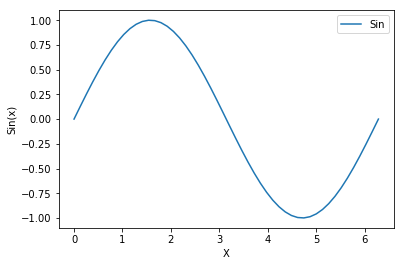

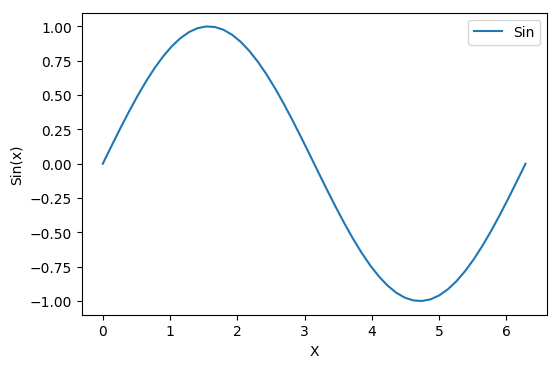

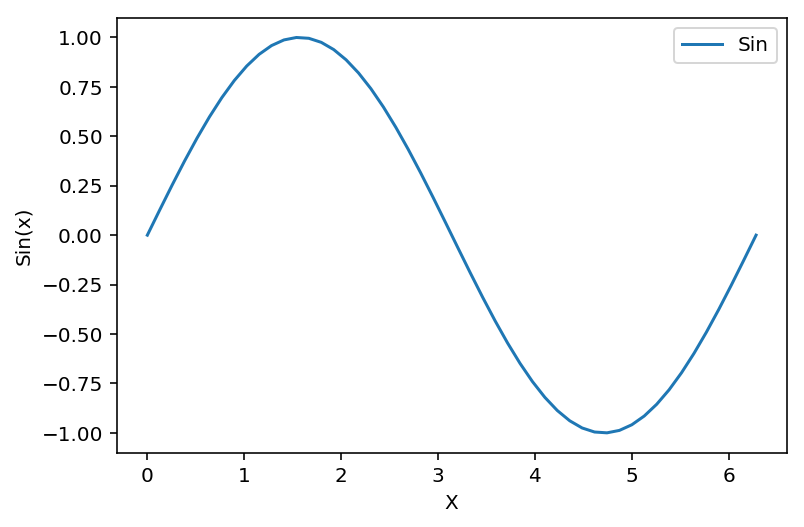

In [33]:
for dpi in [None, 100, 144]:
    fig, ax = plt.subplots(dpi=dpi)
    ax.plot(x, y, label="Sin")
    ax.set(xlabel="X", ylabel="Sin(x)")
    ax.legend()
    print(fig.get_size_inches(), fig.get_dpi())

# This looks good here and in the paper (see the middle one)

## DPI and Figsize

[12.  4.] 100


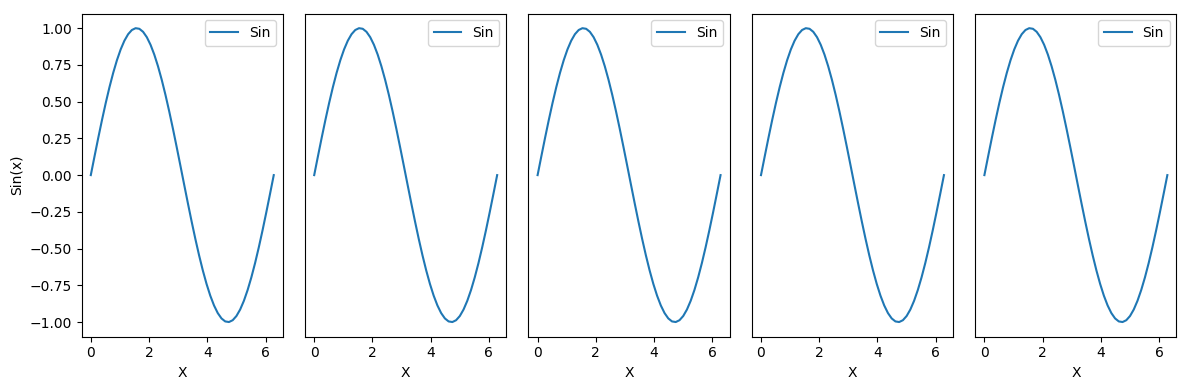

In [23]:
sp = 5
fig, axes = plt.subplots(1, sp, dpi=100)
fig.set_size_inches(np.array(mpl.rcParams["figure.figsize"]) * np.array([2, 1])) # Double the width to make full width

for i in range(sp):
    axes[i].plot(x, y, label="Sin")
    axes[i].set(xlabel="X", ylabel="Sin(x)")
    axes[i].legend()
    if i != 0:
        axes[i].set(yticks=[], ylabel="")
plt.tight_layout()
print(fig.get_size_inches(), fig.get_dpi())

# This also looks good (well not quite but clean up is easy) here and in the paper! Note how the legend and labels are the right size!